In [16]:
import numpy as np

from easydynamics.sample import GaussianComponent
from easydynamics.sample import LorentzianComponent
from easydynamics.sample import VoigtComponent
from easydynamics.sample import DHOComponent
from easydynamics.sample import PolynomialComponent
from easydynamics.sample import DeltaFunctionComponent
from easydynamics.sample import SampleModel

from easydynamics.resolution import ResolutionHandler


import matplotlib.pyplot as plt


In [17]:
Gaussian=GaussianComponent(name='Gaussian',center=0,width=0.5,area=1)
Gaussian

GaussianComponent(name=Gaussian, area=<Parameter 'Gaussianarea': 1.0000 meV, bounds=[0.0:inf]>, center=<Parameter 'Gaussiancenter': 0.0000 meV, bounds=[-inf:inf]>, width=<Parameter 'Gaussianwidth': 0.5000 meV, bounds=[0.0:inf]>)

Text(0, 0.5, 'y')

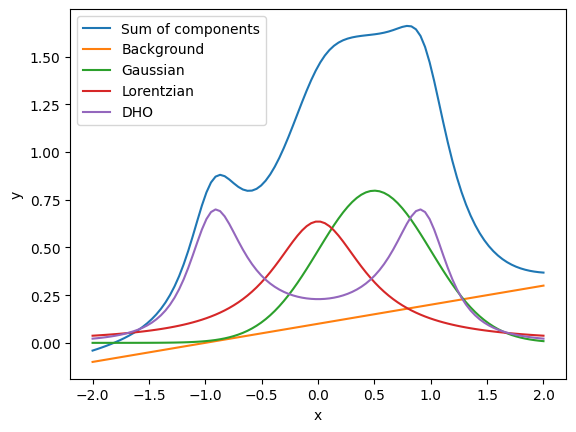

In [27]:

Sample= SampleModel(name='MySampleModel')
Sample.add_component(GaussianComponent(name='Gaussian',center=0.5,width=0.5,area=1))
Sample.add_component(LorentzianComponent(name='Lorentzian',center=0, width=0.5, area=1))
Sample.add_component(PolynomialComponent(name='BG',coefficients=[0.1, 0.1]))
Sample.add_component(DHOComponent(name='DHO',center=1, width=0.3, area=1.2))

x=np.linspace(-2, 2, 100)
y=Sample.evaluate(x)
plt.plot(x, y, label='Sum of components')
plt.plot(x, Sample.evaluate_component('BG',x), label='Background')
plt.plot(x, Sample.evaluate_component('Gaussian',x), label='Gaussian')
plt.plot(x, Sample.evaluate_component('Lorentzian',x), label='Lorentzian')
plt.plot(x, Sample.evaluate_component('DHO',x), label='DHO')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


In [19]:
# The area under the DHO curve is indeed equal to the area parameter.
xx=np.linspace(-10, 10, 10000)
yy=Sample.evaluate_component('DHO',xx)
area= np.trapezoid(yy, xx)
print(f"Area under DHO curve: {area:.4f}")

Area under DHO curve: 1.1998


<Parameter 'Gaussiancenter': 0.0000 meV (fixed), bounds=[-inf:inf]>

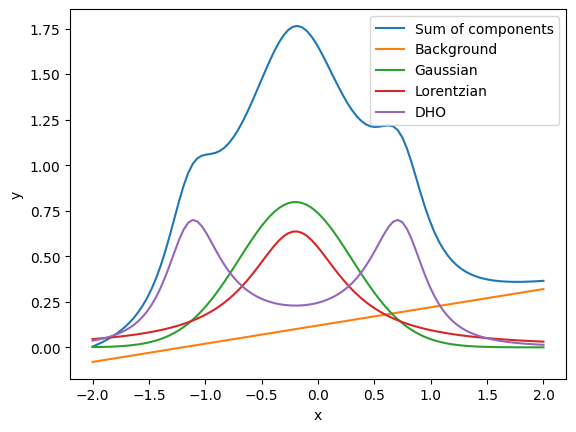

In [28]:
# Check what happens when the center is not given and an offset is applied

Sample= SampleModel(name='MySampleModel')
Sample.add_component(GaussianComponent(name='Gaussian',width=0.5,area=1))
Sample.add_component(LorentzianComponent(name='Lorentzian', width=0.5, area=1))
Sample.add_component(PolynomialComponent(name='BG',coefficients=[0.1, 0.1]))
Sample.add_component(DHOComponent(name='DHO',center=1, width=0.3, area=1.2))

Sample.set_offset(-0.2)

x=np.linspace(-2, 2, 100)
y=Sample.evaluate(x)
plt.plot(x, y, label='Sum of components')
plt.plot(x, Sample.evaluate_component('BG',x), label='Background')
plt.plot(x, Sample.evaluate_component('Gaussian',x), label='Gaussian')
plt.plot(x, Sample.evaluate_component('Lorentzian',x), label='Lorentzian')
plt.plot(x, Sample.evaluate_component('DHO',x), label='DHO')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')



Gaussian.center


Text(0, 0.5, 'y')

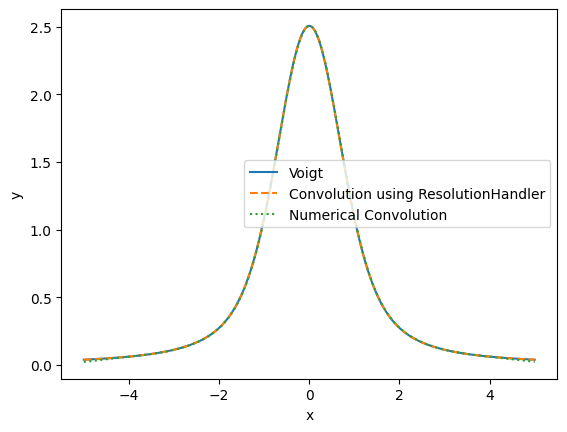

In [29]:
# Try out the resolution handler

Gaussian= GaussianComponent(center=0,width=0.5,area=2)
Lorentzian=LorentzianComponent(center=0, width=0.5, area=3)

Sample= SampleModel('MyModel')
Sample.add_component(Lorentzian)

Resolution=SampleModel('Resolution')
Resolution.add_component(Gaussian)

Voigt=VoigtComponent(center=0, Gwidth=0.5, Lwidth=0.5, area=6)


x=np.linspace(-5, 5, 1000)

MyResolutionHandler=ResolutionHandler()
Convolution=MyResolutionHandler.convolve(x, Sample, Resolution)
NumericalConvolution=MyResolutionHandler.numerical_convolve(x, Sample, Resolution)


plt.plot(x, Voigt.evaluate(x), label='Voigt')
plt.plot(x, Convolution, label='Convolution using ResolutionHandler',linestyle='--')
plt.plot(x, NumericalConvolution, label='Numerical Convolution', linestyle=':')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


In [22]:
Sample.components.items()

dict_items([('Lorentzian', LorentzianComponent(name=Lorentzian, area=<Parameter 'Lorentzianarea': 3.0000 meV, bounds=[-inf:inf]>, center=<Parameter 'Lorentziancenter': 0.0000 meV, bounds=[-inf:inf]>, width=<Parameter 'Lorentzianwidth': 0.5000 meV, bounds=[-inf:inf]>))])

In [23]:
Convolution

array([0.03898482, 0.06533909, 0.13263277, 0.41319603, 1.88895821,
       1.88895821, 0.41319603, 0.13263277, 0.06533909, 0.03898482])

Text(0, 0.5, 'y')

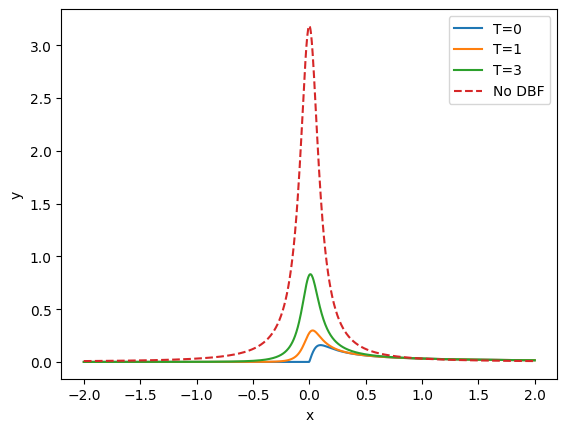

In [30]:
from easydynamics.sample.components import DetailedBalance

# Example of DetailedBalance

x=np.linspace(-2, 2, 1000)
Lorentzian=LorentzianComponent(center=0, width=0.1, area=1)

DetailedBalanceT1=DetailedBalance(x,temperature_K=0.0)
plt.plot(x,Lorentzian.evaluate(x)*DetailedBalanceT1, label='T=0')

# DetailedBalanceT2=DetailedBalance(x,temperature_K=0.1)
# plt.plot(x,Lorentzian.evaluate(x)*DetailedBalanceT2, label='T=0.1')

DetailedBalanceT3=DetailedBalance(x,temperature_K=1)
plt.plot(x,Lorentzian.evaluate(x)*DetailedBalanceT3, label='T=1')

DetailedBalanceT3=DetailedBalance(x,temperature_K=3)
plt.plot(x,Lorentzian.evaluate(x)*DetailedBalanceT3, label='T=3')

plt.plot(x, Lorentzian.evaluate(x), label='No DBF', linestyle='--')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')


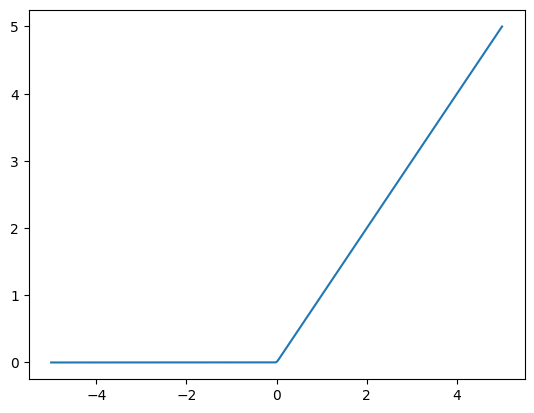

In [25]:
x=np.linspace(-5, 5, 1000)

DetailedBalanceT1=DetailedBalance(x,temperature_K=0.1)
plt.plot(x,DetailedBalanceT1)

Text(0, 0.5, 'y')

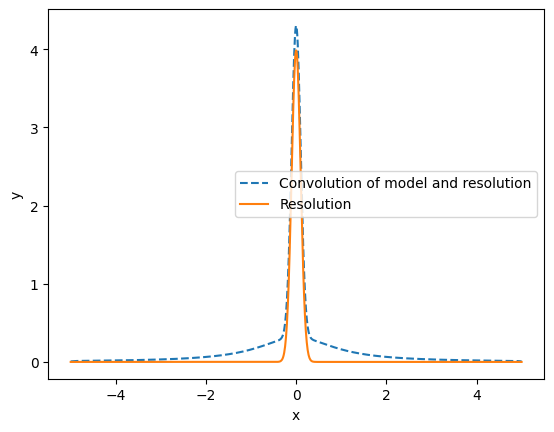

In [26]:
Gaussian= GaussianComponent(width=0.1,area=1)
Lorentzian=LorentzianComponent(width=1, area=1)
DeltaFunction=DeltaFunctionComponent(area=1)

Sample= SampleModel('MyModel')
Sample.add_component(Lorentzian)
Sample.add_component(DeltaFunction)

Resolution=SampleModel('MyRes')
Resolution.add_component(Gaussian)
MyResolutionHandler=ResolutionHandler()
Convolution=MyResolutionHandler.numerical_convolve(x, Sample, Resolution)

x=np.linspace(-5, 5, 1000)
plt.plot(x, Convolution, label='Convolution of model and resolution', linestyle='--')

plt.plot(x,Resolution.evaluate(x), label='Resolution')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')


